<a href="https://colab.research.google.com/github/lucasvx273/Machine_Learning_LPS/blob/main/Machine_Learning_EstadoSP_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
df = pd.read_csv("/content/sao-paulo-properties-april-2019.csv")
df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [6]:
df_rent = df[df["Negotiation Type"] == "rent"]
df_sale = df[df["Negotiation Type"] == "sale"]
df_rent.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [9]:
px.set_mapbox_access_token(open("/content/mapbox_token.txt").read())

In [18]:
fig = px.scatter_mapbox(df_rent, lat="Latitude", lon="Longitude", color="Price", size="Size",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, opacity=0.3)

fig.update_coloraxes(colorscale = [[0, "rgb(166,206,227, 0.5)"],
                                   [0.02, "rgb(31,120,180, 0.5)"],
                                    [0.05, "rgb(178,223,138, 0.5)"],
                                    [0.10, "rgb(51,160,44, 0.5)"],
                                    [0.15, "rgb(251,154,153, 0.5)"],
                                    [1, "rgb(227,26,28,0.5)"]
                                  ],
                                )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)), template="plotly_dark")
fig.show()

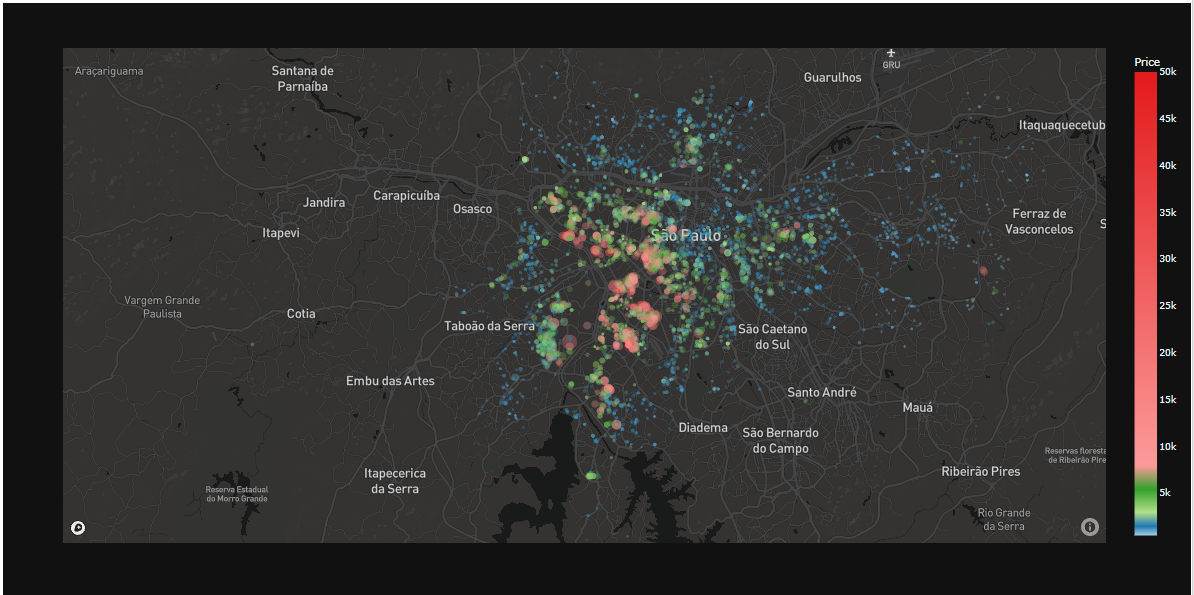

In [20]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd03495c390>,
      dtype=object)

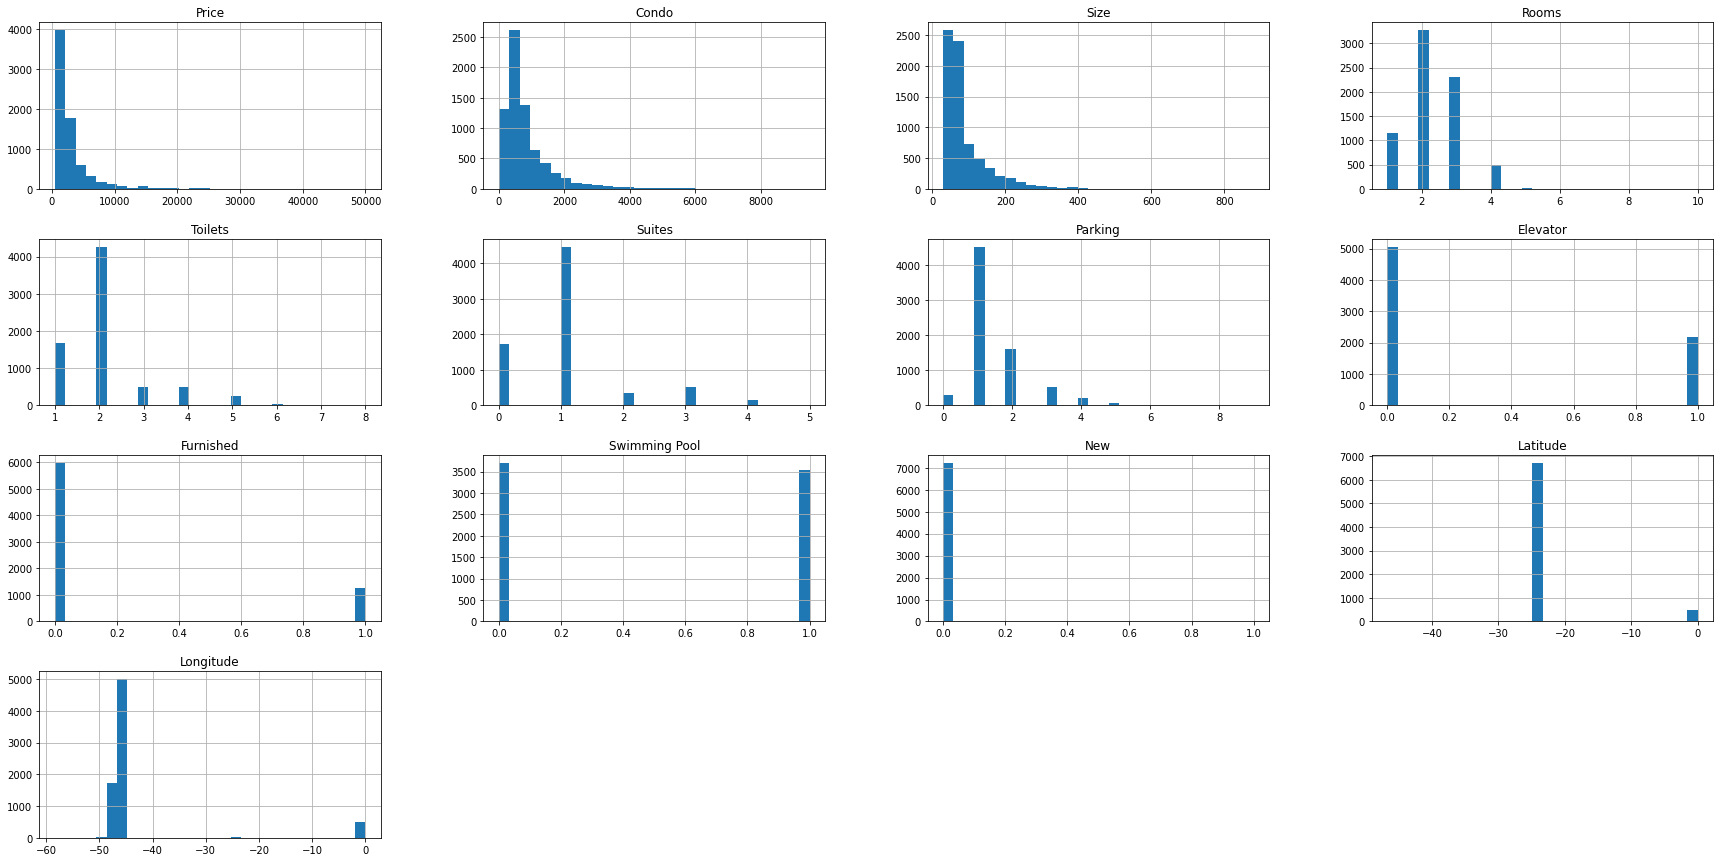

In [21]:
df_rent.hist(bins=30, figsize=(30,15))

In [22]:
df_rent["Price"].median()

2000.0

In [23]:
df_rent["Property Type"].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [24]:
df_rent["Suites"].value_counts()

1    4474
0    1715
3     523
2     353
4     159
5       4
Name: Suites, dtype: int64

In [25]:
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [26]:
df_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


In [27]:
one_hot = pd.get_dummies(df_cleaned["District"])

In [28]:
one_hot

,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,Brás/São Paulo,Butantã/São Paulo,Cachoeirinha/São Paulo,Cambuci/São Paulo,Campo Belo/São Paulo,Campo Grande/São Paulo,Campo Limpo/São Paulo,Cangaíba/São Paulo,Capão Redondo/São Paulo,Carrão/São Paulo,Casa Verde/São Paulo,Cidade Ademar/São Paulo,Cidade Dutra/São Paulo,Cidade Líder/São Paulo,Cidade Tiradentes/São Paulo,Consolação/São Paulo,Cursino/São Paulo,Ermelino Matarazzo/São Paulo,Freguesia do Ó/São Paulo,Grajaú/São Paulo,Guaianazes/São Paulo,Iguatemi/São Paulo,Ipiranga/São Paulo,Itaim Bibi/São Paulo,Itaim Paulista/São Paulo,Itaquera/São Paulo,Jabaquara/São Paulo,Jaguaré/São Paulo,Jaraguá/São Paulo,Jardim Helena/São Paulo,...,Pari/São Paulo,Parque do Carmo/São Paulo,Pedreira/São Paulo,Penha/São Paulo,Perdizes/São Paulo,Pinheiros/São Paulo,Pirituba/São Paulo,Ponte Rasa/São Paulo,Raposo Tavares/São Paulo,República/São Paulo,Rio Pequeno/São Paulo,Sacomã/São Paulo,Santa Cecília/São Paulo,Santana/São Paulo,Santo Amaro/São Paulo,Sapopemba/São Paulo,Saúde/São Paulo,Socorro/São Paulo,São Lucas/São Paulo,São Mateus/São Paulo,São Miguel/São Paulo,São Rafael/São Paulo,Sé/São Paulo,Tatuapé/São Paulo,Tremembé/São Paulo,Tucuruvi/São Paulo,Vila Andrade/São Paulo,Vila Curuçá/São Paulo,Vila Formosa/São Paulo,Vila Guilherme/São Paulo,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11206,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11207,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11208,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df = df_cleaned.drop("District",axis=1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,Longitude,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,Brás/São Paulo,Butantã/São Paulo,Cachoeirinha/São Paulo,Cambuci/São Paulo,Campo Belo/São Paulo,Campo Grande/São Paulo,Campo Limpo/São Paulo,Cangaíba/São Paulo,Capão Redondo/São Paulo,Carrão/São Paulo,Casa Verde/São Paulo,Cidade Ademar/São Paulo,Cidade Dutra/São Paulo,Cidade Líder/São Paulo,Cidade Tiradentes/São Paulo,Consolação/São Paulo,Cursino/São Paulo,Ermelino Matarazzo/São Paulo,...,Pari/São Paulo,Parque do Carmo/São Paulo,Pedreira/São Paulo,Penha/São Paulo,Perdizes/São Paulo,Pinheiros/São Paulo,Pirituba/São Paulo,Ponte Rasa/São Paulo,Raposo Tavares/São Paulo,República/São Paulo,Rio Pequeno/São Paulo,Sacomã/São Paulo,Santa Cecília/São Paulo,Santana/São Paulo,Santo Amaro/São Paulo,Sapopemba/São Paulo,Saúde/São Paulo,Socorro/São Paulo,São Lucas/São Paulo,São Mateus/São Paulo,São Miguel/São Paulo,São Rafael/São Paulo,Sé/São Paulo,Tatuapé/São Paulo,Tremembé/São Paulo,Tucuruvi/São Paulo,Vila Andrade/São Paulo,Vila Curuçá/São Paulo,Vila Formosa/São Paulo,Vila Guilherme/São Paulo,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,-23.543138,-46.479486,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,-23.550239,-46.480718,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,-23.542818,-46.485665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,-23.547171,-46.483014,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,-23.525025,-46.482436,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,-23.617682,-46.694963,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,-23.606891,-46.695934,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,-23.612287,-46.681482,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split

In [39]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [42]:
X

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,Longitude,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,Brás/São Paulo,Butantã/São Paulo,Cachoeirinha/São Paulo,Cambuci/São Paulo,Campo Belo/São Paulo,Campo Grande/São Paulo,Campo Limpo/São Paulo,Cangaíba/São Paulo,Capão Redondo/São Paulo,Carrão/São Paulo,Casa Verde/São Paulo,Cidade Ademar/São Paulo,Cidade Dutra/São Paulo,Cidade Líder/São Paulo,Cidade Tiradentes/São Paulo,Consolação/São Paulo,Cursino/São Paulo,Ermelino Matarazzo/São Paulo,Freguesia do Ó/São Paulo,...,Pari/São Paulo,Parque do Carmo/São Paulo,Pedreira/São Paulo,Penha/São Paulo,Perdizes/São Paulo,Pinheiros/São Paulo,Pirituba/São Paulo,Ponte Rasa/São Paulo,Raposo Tavares/São Paulo,República/São Paulo,Rio Pequeno/São Paulo,Sacomã/São Paulo,Santa Cecília/São Paulo,Santana/São Paulo,Santo Amaro/São Paulo,Sapopemba/São Paulo,Saúde/São Paulo,Socorro/São Paulo,São Lucas/São Paulo,São Mateus/São Paulo,São Miguel/São Paulo,São Rafael/São Paulo,Sé/São Paulo,Tatuapé/São Paulo,Tremembé/São Paulo,Tucuruvi/São Paulo,Vila Andrade/São Paulo,Vila Curuçá/São Paulo,Vila Formosa/São Paulo,Vila Guilherme/São Paulo,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,-46.479486,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,148,45,2,2,1,1,0,0,0,-23.550239,-46.480718,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100,48,2,2,1,1,0,0,0,-23.542818,-46.485665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,200,48,2,2,1,1,0,0,0,-23.547171,-46.483014,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,410,55,2,2,1,1,1,0,0,-23.525025,-46.482436,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,595,73,1,2,1,1,0,0,1,-23.617682,-46.694963,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11206,3000,208,4,4,3,3,1,1,1,-23.606891,-46.695934,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11207,710,55,1,1,0,1,0,1,1,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11208,2354,205,3,2,1,2,1,0,0,-23.612287,-46.681482,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [48]:
y_train

198       855
5327     3300
2830     1500
5307     7500
443      1600
         ... 
3352     2500
10191    3500
9273     2200
1266     1500
1853     3700
Name: Price, Length: 5059, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
#Toda a inteligência está aqui
rf_reg

RandomForestRegressor()

In [53]:
y_test.iloc[0]

4000

In [54]:
x_test.iloc[0].head(10)

Condo            800.000000
Size             100.000000
Rooms              3.000000
Toilets            4.000000
Suites             1.000000
Parking            2.000000
Elevator           1.000000
Furnished          0.000000
Swimming Pool      1.000000
Latitude         -23.523761
Name: 1883, dtype: float64

In [55]:
rf_reg.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([3577.18])

In [60]:
#Agora bateria de testes:

n = 3

print("Valor atual do imóvel: ", y_test.iloc[n])
print("Dados do imóvel:\n", x_test.iloc[n].head(10))

predicao = rf_reg.predict(x_test.iloc[n].values.reshape(1,-1))
print("\nA predição é de: ", predicao, "\n\n")

Valor atual do imóvel:  1000
Dados do imóvel:
 Condo            395.000000
Size              55.000000
Rooms              2.000000
Toilets            2.000000
Suites             1.000000
Parking            1.000000
Elevator           1.000000
Furnished          0.000000
Swimming Pool      1.000000
Latitude         -23.564779
Name: 142, dtype: float64

A predição é de:  [1349.] 




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

